In [1]:
import pandas as pd

In [3]:
gdp_file = "API_NY.GDP.MKTP.CD_DS2_en_csv_v2_88.csv"
exchange_rate_file = "AEXCHUS.csv"

In [4]:
gdp_df = pd.read_csv(gdp_file, skiprows=4)

In [5]:
exchange_df = pd.read_csv(exchange_rate_file)

In [6]:
print("GDP Data:")
display(gdp_df.head())

GDP Data:


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.481857e+09,2.929447e+09,3.279344e+09,3.648573e+09,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.421063e+10,2.496398e+10,2.707880e+10,3.177575e+10,3.028579e+10,3.381317e+10,...,8.982778e+11,8.289428e+11,9.729989e+11,1.012306e+12,1.009721e+12,9.333918e+11,1.085745e+12,1.191423e+12,1.245472e+12,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.913422e+10,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426000e+10,1.449724e+10,1.723305e+10,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.190495e+10,1.270788e+10,1.363076e+10,1.446909e+10,1.580376e+10,1.692109e+10,...,7.717669e+11,6.943610e+11,6.878492e+11,7.704950e+11,8.264838e+11,7.898017e+11,8.493124e+11,8.839739e+11,7.991060e+11,NaN
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.049642e+10,5.276162e+10,7.369015e+10,7.945069e+10,7.089796e+10,4.850156e+10,6.650513e+10,1.043997e+11,8.482465e+10,NaN


In [7]:
print("Exchange Rate Data:")
display(exchange_df.head())

Exchange Rate Data:


,observation_date,AEXCHUS
0,1981-01-01,1.7100
1,1982-01-01,1.8979
2,1983-01-01,1.9810
3,1984-01-01,2.3303
4,1985-01-01,2.9434


In [8]:
# filtering GDP for china
gdp_china = gdp_df[gdp_df["Country Name"] == "China"]

In [10]:
#dropping unnecessary columns
gdp_china = gdp_china.drop(columns=["Country Name", "Country Code", "Indicator Name", "Indicator Code", "Unnamed: 68"])

In [12]:
#Reshaping gdp data from wide to long format
gdp_china = gdp_china.melt(var_name="Year", value_name="GDP (USD)")

In [13]:
# Convert Year to integer
gdp_china["Year"] = gdp_china["Year"].astype(int)

In [15]:
#converting exchange rate date to datetime format
exchange_df["observation_date"] = pd.to_datetime(exchange_df["observation_date"])
exchange_df["Year"] = exchange_df["observation_date"].dt.year

In [16]:
#merge gdp & exchange rate data
merged_df = pd.merge(gdp_china, exchange_df, on="Year", how="inner")

In [17]:
display(merged_df.head())

,Year,GDP (USD),observation_date,AEXCHUS
0,1981,1.958664e+11,1981-01-01,1.7100
1,1982,2.050897e+11,1982-01-01,1.8979
2,1983,2.306867e+11,1983-01-01,1.9810
3,1984,2.599465e+11,1984-01-01,2.3303
4,1985,3.094880e+11,1985-01-01,2.9434


In [18]:
import matplotlib.pyplot as plt

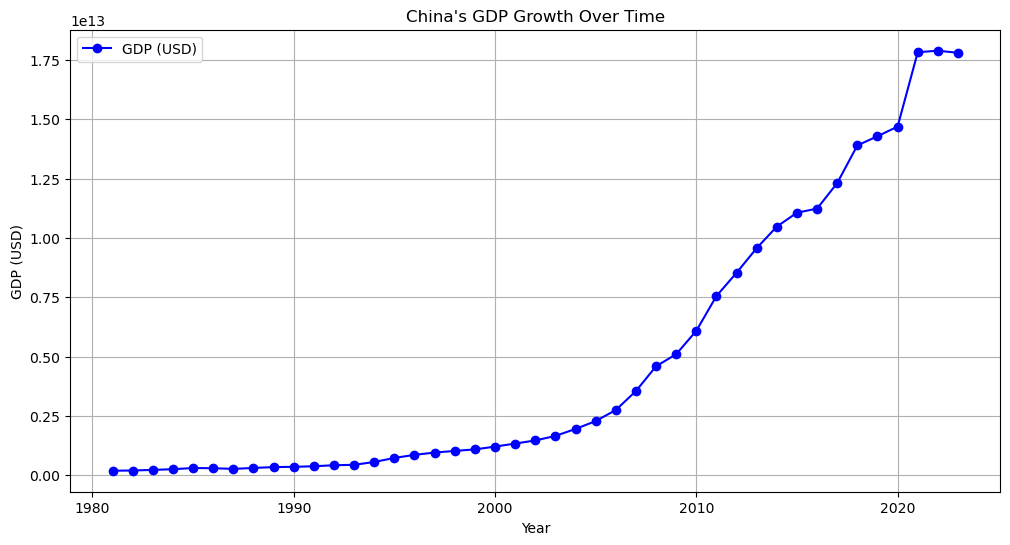

In [20]:
#plotting GDP growth 
plt.figure(figsize=(12,6))
plt.plot(merged_df["Year"], merged_df["GDP (USD)"], marker='o', linestyle='-', color='b', label="GDP (USD)")
plt.xlabel("Year")
plt.ylabel("GDP (USD)")
plt.title("China's GDP Growth Over Time")
plt.legend()
plt.grid()
plt.show()

In [24]:
print(merged_df.columns)

Index(['Year', 'GDP (USD)', 'observation_date', 'AEXCHUS'], dtype='object')


In [25]:
merged_df.rename(columns={"AEXCHUS": "CNY/USD Exchange Rate"}, inplace=True)


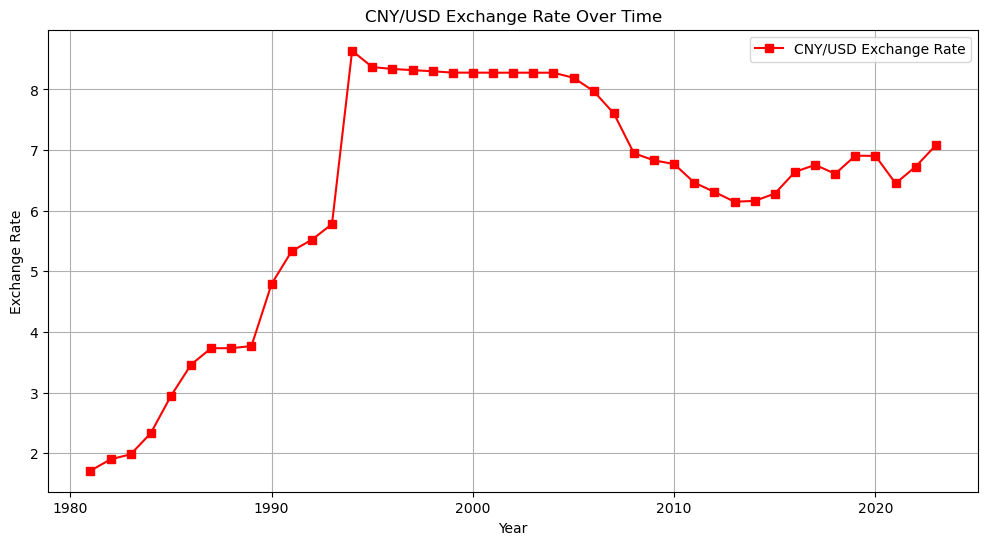

In [26]:
#plot exchange rate trends 
plt.figure(figsize=(12,6))
plt.plot(merged_df["Year"], merged_df["CNY/USD Exchange Rate"], marker='s', linestyle='-', color='r', label="CNY/USD Exchange Rate")
plt.xlabel("Year")
plt.ylabel("Exchange Rate")
plt.title("CNY/USD Exchange Rate Over Time")
plt.legend()
plt.grid()
plt.show()

In [27]:
merged_df.to_csv("cleaned_china_gdp_exchange.csv", index=False)
print("Cleaned dataset saved successfully.")

Cleaned dataset saved successfully.
